### Limitations of neural networks
* Most deep learning models are not sequential.
* They need much more data than your sales generate.
* Their predictions are hard to explain

## Import and Prepare Data

In [1]:
import pandas as pd
data = pd.read_csv('E:/Combined VBRK.txt')

C:\Users\Tirth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data.head()

,MANDT,VBELN,FKART,FKTYP,VBTYP,WAERK,BELNR,GJAHR,BUKRS,NETWR,KUNAG,FKDAT,BELNR.1,KURRF,ERDAT
0,400,1266268.0,ZF2C,L,M,INR,,0.0,BWPL,93927.0,10000008.0,20160719.0,,1.0,20160719.0
1,400,1266270.0,ZF2C,L,M,INR,,0.0,BWPL,79938.0,10000008.0,20160719.0,,1.0,20160719.0
2,400,1270953.0,ZF2C,L,M,INR,,0.0,BWPL,118851.0,10000008.0,20160927.0,,1.0,20160927.0
3,400,1271403.0,ZF2C,L,M,INR,,0.0,BWPL,114889.0,10000008.0,20161004.0,,1.0,20161004.0
4,400,1272693.0,ZF2C,L,M,INR,,0.0,BWPL,39617.0,10000008.0,20161025.0,,1.0,20161025.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191306 entries, 0 to 191305
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MANDT    191306 non-null  object 
 1   VBELN    191305 non-null  float64
 2   FKART    191305 non-null  object 
 3   FKTYP    191305 non-null  object 
 4   VBTYP    191305 non-null  object 
 5   WAERK    191305 non-null  object 
 6   BELNR    191305 non-null  object 
 7   GJAHR    191305 non-null  float64
 8   BUKRS    191305 non-null  object 
 9   NETWR    191305 non-null  float64
 10  KUNAG    191305 non-null  float64
 11  FKDAT    191305 non-null  float64
 12  BELNR.1  191305 non-null  object 
 13  KURRF    191305 non-null  float64
 14  ERDAT    191305 non-null  float64
dtypes: float64(7), object(8)
memory usage: 21.9+ MB


In [4]:
# AS one of the data entry is empty we can just drop it
data.dropna(inplace = True)

In [5]:
import numpy as np
# As we can see that dates have been written in float format so
# First convert dates in float to int
data['FKDAT'] = data['FKDAT'].apply(np.int64)
data['ERDAT'] = data['ERDAT'].apply(np.int64)

# Then convert it into Date format
data['FKDAT'] = pd.to_datetime(data['FKDAT'], format='%Y%m%d')
data['ERDAT'] = pd.to_datetime(data['ERDAT'], format = '%Y%m%d')

In [6]:
data.drop(['MANDT','VBELN','FKART','FKTYP','VBTYP','WAERK','BELNR','GJAHR','BUKRS','KUNAG','FKDAT','BELNR.1','KURRF'] , axis = 1 , inplace = True)

In [7]:
data.columns = ['Sales' , 'Date']

In [8]:
data['Date'] = data['Date'].apply(lambda x: str(x)[:-9])  
data = data.groupby('Date')['Sales'].sum().reset_index()
data.head()

,Date,Sales
0,2016-04-01,34280332.36
1,2016-04-02,37023055.61
2,2016-04-03,29670807.11
3,2016-04-04,37379303.68
4,2016-04-05,38467620.57


In [9]:
data.set_index('Date', inplace= True)

In [10]:
import numpy as np
timesteps = data.index.to_numpy()
sales = data["Sales"].to_numpy()
print(f'Median: {np.median(sales)}\n , Mean: {np.mean(sales)}\n , Minimum: {np.min(sales)}\n , Maximum: {np.max(sales)}')

timesteps[:10] , sales[:10]

Median: 59391313.75
 , Mean: 64447808.132337436
 , Minimum: 222.42
 , Maximum: 147298173.63000003


(array(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
        '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
        '2016-04-09', '2016-04-10'], dtype=object),
 array([34280332.36      , 37023055.61000001, 29670807.11000001,
        37379303.68000002, 38467620.57000001, 40662244.92000001,
        44213369.21999999, 38964840.52000001, 41075477.17      ,
        33822838.43000001]))

In [40]:
import matplotlib.pyplot as plt
# Create a function to plot time series data
def plot_time_series(timesteps, values , color , format='.', start=0, end=None, label=None):
  # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(False)

In [12]:
split_size = int(0.8 * len(sales))

X_train , y_train = timesteps[:split_size] , sales[:split_size]

X_test , y_test = timesteps[split_size:] , sales[split_size:]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(1365, 342, 1365, 342)

In [13]:
def errors(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    y_new = np.abs(y_true - y_pred)
    median = np.median(y_new)
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    y_new2 = y_new / y_true * 100
    median_per = np.median(y_new2)
    mean_per = np.median(y_new2)
    
    return {'MAE: ' : mae.numpy() , 'MSE' : mse.numpy() , 'RMSE' : rmse.numpy() ,
            'MAPE' : mape.numpy() , 'Median' : median , '% error wrt median' : median_per , '% error wrt mean' : mean_per}

# Model - 1(Start)

In [14]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [15]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [16]:
full_windows, full_labels = make_windows(sales , window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1700, 1700)

In [17]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [18]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1360, 340, 1360, 340)

In [19]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [66]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
INFO:tensorflow:Assets written to: mod

In [67]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 2ms/step - loss: 10363095.0000 - mae: 10363095.0000


[10363095.0, 10363095.0]

In [21]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

# Make predictions using model_1 on the test dataset and view the results
# model_1_preds = make_preds(model_1, test_windows)
# model_1_preds[:10]

In [22]:
def upper_lower(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    upper = y_pred + (y_pred/10)
    lower = y_pred - (y_pred/10)
    return upper , lower

In [70]:
upper , lower = upper_lower(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)

In [71]:
Dense_error = errors(y_true = tf.squeeze(test_labels) , y_pred = model_1_preds)
print(Dense_error)

{'MAE: ': 10363094.0, 'MSE': 270806880000000.0, 'RMSE': 16456211.0, 'MAPE': 137670.25, 'Median': 7049504.0, '% error wrt median': 7.6388135, '% error wrt mean': 7.6388135}


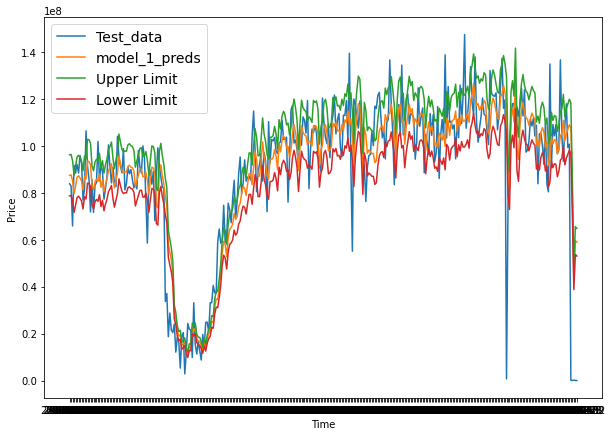

In [77]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format="-", label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, format="-", label="model_1_preds")
plot_time_series(timesteps=X_test[-len(test_windows):], values=upper, format="-", label="Upper Limit")
plot_time_series(timesteps=X_test[-len(test_windows):], values=lower, format="-", label="Lower Limit")

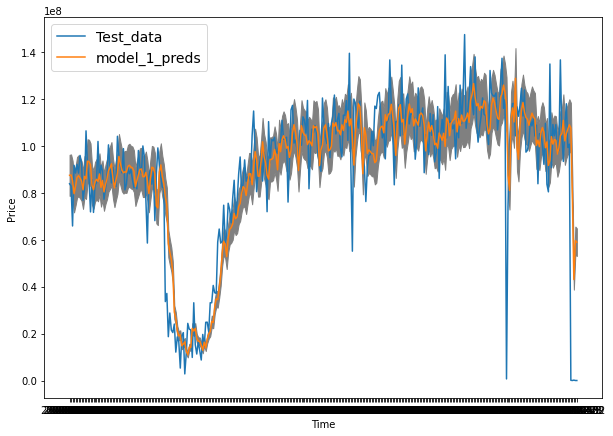

In [78]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format="-", label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, format="-", label="model_1_preds")
plt.fill_between(x = X_test[-len(test_windows):] , y1 = upper , y2 = lower , color='grey')

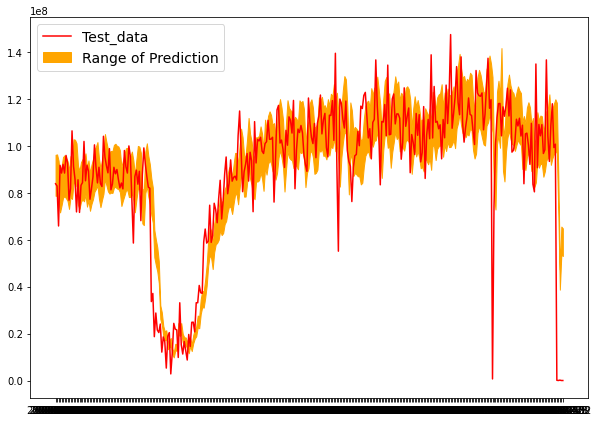

In [79]:
plt.figure(figsize=(10, 7))
plt.plot(X_test[-len(test_windows):] , test_labels[:, 0] , label="Test_data" , color = 'red')
plt.fill_between(x = X_test[-len(test_windows):] , y1 = upper , y2 = lower , color='orange' , label = 'Range of Prediction')
plt.legend(fontsize=14)

# Model - 2(LSTM)

In [80]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
11/11 [==============================] - 2s 30ms/step - loss: 55547752.0000 - val_loss: 77601120.0000
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 44200724.0000 - val_loss: 58565880.0000
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 30025722.0000 - val_loss: 32858440.0000
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 13592198.0000 - val_loss: 17846906.0000
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 11278350.0000 - val_loss: 16531156.0000
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - lo

Epoch 55/100
11/11 [==============================] - 0s 4ms/step - loss: 5901585.0000 - val_loss: 10772755.0000
Epoch 56/100
11/11 [==============================] - 0s 4ms/step - loss: 5910653.5000 - val_loss: 11032703.0000
Epoch 57/100
11/11 [==============================] - 0s 4ms/step - loss: 5932632.0000 - val_loss: 10820472.0000
Epoch 58/100
11/11 [==============================] - 0s 4ms/step - loss: 5893401.0000 - val_loss: 10870293.0000
Epoch 59/100
11/11 [==============================] - 0s 4ms/step - loss: 5857415.0000 - val_loss: 10778484.0000
Epoch 60/100
11/11 [==============================] - 0s 4ms/step - loss: 5924738.5000 - val_loss: 10866017.0000
Epoch 61/100
11/11 [==============================] - 0s 5ms/step - loss: 5919564.5000 - val_loss: 10795250.0000
Epoch 62/100
11/11 [==============================] - 0s 4ms/step - loss: 5843056.5000 - val_loss: 10801768.0000
Epoch 63/100
11/11 [==============================] - 0s 4ms/step - loss: 5835818.0000 - val_los

In [81]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 1ms/step - loss: 10666485.0000


10666485.0

In [82]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([84402296., 86212190., 82838616., 79969180., 83092720., 87904120.,
       87894616., 84902110., 87708270., 87018140.], dtype=float32)>

In [83]:
errors(y_true = tf.squeeze(test_labels) , y_pred = model_5_preds)

{'MAE: ': 10666485.0,
 'MSE': 282932580000000.0,
 'RMSE': 16820600.0,
 'MAPE': 100091.914,
 'Median': 6962652.0,
 '% error wrt median': 7.5615325,
 '% error wrt mean': 7.5615325}

# Model - 3(Dense Model)

In [84]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(150 , activation="relu"),
    layers.Dense(100 , activation = 'relu') , 
    layers.Dense(50 , activation="relu"),
    layers.Dense(10 , activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_6_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
11/11 [==============================] - 1s 13ms/step - loss: 26668170.0000 - mae: 26668170.0000 - val_loss: 23609232.0000 - val_mae: 23609232.0000
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 9719446.0000 - mae: 9719446.0000 - val_loss: 14427163.0000 - val_mae: 14427163.0000
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 7305914.5000 - mae: 7305914.5000 - val_loss: 11217614.0000 - val_mae: 11217614.0000
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 6770934.0000 - mae: 6770934.0000 - val_loss: 12173789.0000 - val_mae: 12173789.0000
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 6646773.5000 - mae: 6646773.5000 - val_loss: 10930818.0000 - val_mae: 1093

11/11 [==============================] - 0s 3ms/step - loss: 5518196.0000 - mae: 5518196.0000 - val_loss: 11106785.0000 - val_mae: 11106785.0000
Epoch 99/100
11/11 [==============================] - 0s 3ms/step - loss: 5551243.0000 - mae: 5551243.0000 - val_loss: 10786424.0000 - val_mae: 10786424.0000
Epoch 100/100
11/11 [==============================] - 0s 3ms/step - loss: 5425915.0000 - mae: 5425915.0000 - val_loss: 10926331.0000 - val_mae: 10926331.0000


In [85]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 865us/step - loss: 10363095.0000 - mae: 10363095.0000


[10363095.0, 10363095.0]

In [86]:
# Make predictions with our LSTM model
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([87368290., 87525580., 85115360., 79541610., 82844360., 86518120.,
       87185064., 86215660., 84980960., 81181500.], dtype=float32)>

In [87]:
Dense_error_2 = errors(y_true = tf.squeeze(test_labels) , y_pred = model_1_preds)
print(Dense_error_2)

{'MAE: ': 10363094.0, 'MSE': 270806880000000.0, 'RMSE': 16456211.0, 'MAPE': 137670.25, 'Median': 7049504.0, '% error wrt median': 7.6388135, '% error wrt mean': 7.6388135}


# Model - 4(GRU)

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.GRU(128, activation="linear")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(10 , activation = 'linear')(x)
output = layers.Dense(HORIZON)(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_lstm")

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_2.fit(train_windows,
            train_labels,
            verbose = 0 , 
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets


In [24]:
# Load in best version of model 5 and evaluate on the test data
model_2 = tf.keras.models.load_model("model_experiments/model_2_lstm/")
model_2.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 2ms/step - loss: 10180400.0000


10180400.0

In [25]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

def upper_lower(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    upper = y_pred + (y_pred/10)
    lower = y_pred - (y_pred/10)
    return upper , lower

In [26]:
# Make predictions with our LSTM model
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([84404100., 85720620., 84207896., 76475160., 84683260., 82668664.,
       86514460., 87852936., 85764400., 84437070.], dtype=float32)>

In [27]:
errors(y_true = tf.squeeze(test_labels) , y_pred = model_2_preds)

{'MAE: ': 10180400.0,
 'MSE': 258691180000000.0,
 'RMSE': 16083880.0,
 'MAPE': 63171.19,
 'Median': 6708784.0,
 '% error wrt median': 8.052168,
 '% error wrt mean': 8.052168}

In [25]:
dataframe = {'Prediction' : model_2_preds ,
             'True Value' : tf.squeeze(test_labels) , 'Date' : X_test[-len(test_windows):]}
df = pd.DataFrame(dataframe)
df

,Prediction,True Value,Date
0,84404096.0,83784508.51,2020-01-17
1,85720624.0,82807271.27,2020-01-18
2,84207896.0,65802552.02,2020-01-19
3,76475160.0,91628597.29,2020-01-20
4,84683264.0,88327820.33,2020-01-21
...,...,...,...
335,113332400.0,89035.83,2021-01-15
336,64345480.0,700.41,2021-01-19
337,63893472.0,164301.03,2021-01-28
338,32590856.0,668.27,2021-01-29


In [26]:
df['Date'] = df['Date'].apply(lambda x: str(x)[:-3])  
df = df.groupby('Date')['True Value' , 'Prediction'].sum().reset_index()
df.head()

<ipython-input-26-9e628e0bad88>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby('Date')['True Value' , 'Prediction'].sum().reset_index()


,Date,True Value,Prediction
0,2020-01,1.294742e+09,1.288339e+09
1,2020-02,2.549231e+09,2.517807e+09
2,2020-03,1.791479e+09,1.851338e+09
3,2020-04,5.322602e+08,6.892290e+08
4,2020-05,2.290033e+09,2.072275e+09


In [27]:
df

,Date,True Value,Prediction
0,2020-01,1.294742e+09,1.288339e+09
1,2020-02,2.549231e+09,2.517807e+09
2,2020-03,1.791479e+09,1.851338e+09
3,2020-04,5.322602e+08,6.892290e+08
4,2020-05,2.290033e+09,2.072275e+09
5,2020-06,2.955448e+09,2.903665e+09
6,2020-07,3.284880e+09,3.228165e+09
7,2020-08,3.266354e+09,3.261750e+09
8,2020-09,3.247609e+09,3.233785e+09
9,2020-10,3.557795e+09,3.484364e+09


In [81]:
upper , lower = upper_lower(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_2_preds)

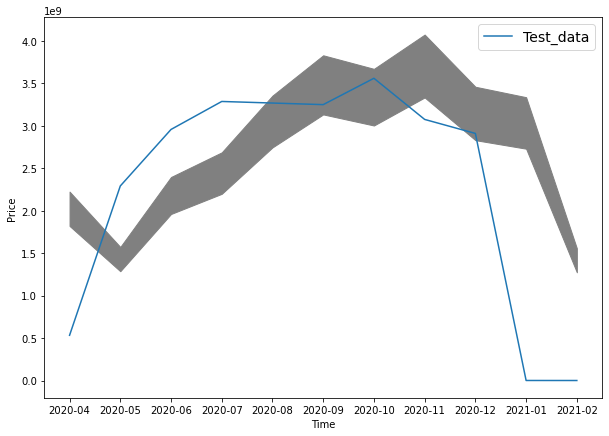

In [82]:
fig = plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format="-", label="Test_data")
plt.fill_between(x = X_test[-len(test_windows):] , y1 = upper , y2 = lower , color='grey')
fig.savefig("filename.png")

In [30]:
dataframe = {'Upper' : upper , 'Lower' : lower , 'Prediction' : model_2_preds ,
             'True Value' : tf.squeeze(test_labels) , 'Date' : X_test[-len(test_windows):]}
df = pd.DataFrame(dataframe)
df

,Upper,Lower,Prediction,True Value,Date
0,92844504.0,75963688.0,84404096.0,83784508.51,2020-01-17
1,94292688.0,77148560.0,85720624.0,82807271.27,2020-01-18
2,92628688.0,75787104.0,84207896.0,65802552.02,2020-01-19
3,84122672.0,68827648.0,76475160.0,91628597.29,2020-01-20
4,93151592.0,76214936.0,84683264.0,88327820.33,2020-01-21
...,...,...,...,...,...
335,124665640.0,101999160.0,113332400.0,89035.83,2021-01-15
336,70780032.0,57910932.0,64345480.0,700.41,2021-01-19
337,70282816.0,57504124.0,63893472.0,164301.03,2021-01-28
338,35849940.0,29331770.0,32590856.0,668.27,2021-01-29


In [36]:
df.insert(4 , 'Outlier' , np.zeros(len(df) , dtype = int))
df.head()

,Upper,Lower,Prediction,True Value,Outlier,Date
0,92844504.0,75963688.0,84404096.0,83784508.51,0,2020-01-17
1,94292688.0,77148560.0,85720624.0,82807271.27,0,2020-01-18
2,92628688.0,75787104.0,84207896.0,65802552.02,0,2020-01-19
3,84122672.0,68827648.0,76475160.0,91628597.29,0,2020-01-20
4,93151592.0,76214936.0,84683264.0,88327820.33,0,2020-01-21


In [43]:
print(df.iloc[0].loc['Upper'])

for i in range(len(df)):
    if(df.iloc[i].loc['Upper'] < df.iloc[i].loc['True Value']):
        df.loc[i , 'Outlier'] = 1
    
    elif(df.iloc[i].loc['Lower'] > df.iloc[i].loc['True Value']):
        df.loc[i , 'Outlier'] = -1
        
df.head()

92844504.0


,Upper,Lower,Prediction,True Value,Outlier,Date
0,92844504.0,75963688.0,84404096.0,83784508.51,0,2020-01-17
1,94292688.0,77148560.0,85720624.0,82807271.27,0,2020-01-18
2,92628688.0,75787104.0,84207896.0,65802552.02,-1,2020-01-19
3,84122672.0,68827648.0,76475160.0,91628597.29,1,2020-01-20
4,93151592.0,76214936.0,84683264.0,88327820.33,0,2020-01-21


In [54]:
up = df.where(df['Outlier'] > 0)
up.dropna(subset = ["Upper"] , inplace=True)
print(len(up))
up[:50]

84


,Upper,Lower,Prediction,True Value,Outlier,Date
3,84122672.0,68827648.0,76475160.0,9.162860e+07,1.0,2020-01-20
5,90935528.0,74401800.0,82668664.0,9.202118e+07,1.0,2020-01-22
11,94581968.0,77385248.0,85983608.0,1.063000e+08,1.0,2020-01-28
19,92706112.0,75850448.0,84278280.0,1.017942e+08,1.0,2020-02-05
21,90614328.0,74139000.0,82376664.0,9.168622e+07,1.0,2020-02-07
26,95800152.0,78381944.0,87091048.0,1.003403e+08,1.0,2020-02-12
32,95149168.0,77849312.0,86499240.0,1.039968e+08,1.0,2020-02-18
46,92155520.0,75399968.0,83777744.0,9.794173e+07,1.0,2020-03-03
49,96520584.0,78971384.0,87745984.0,9.987957e+07,1.0,2020-03-06
58,81287816.0,66508216.0,73898016.0,8.765010e+07,1.0,2020-03-16


In [52]:
down = df.where(df['Outlier'] < 0)
down.dropna(subset = ["Upper"], inplace=True)
print(len(down))
down

56


,Upper,Lower,Prediction,True Value,Outlier,Date
2,92628688.0,75787104.0,84207896.0,6.580255e+07,-1.0,2020-01-19
14,102974352.0,84251744.0,93613048.0,7.179295e+07,-1.0,2020-01-31
16,88206944.0,72169312.0,80188128.0,7.157282e+07,-1.0,2020-02-02
51,96580968.0,79020792.0,87800880.0,7.714379e+07,-1.0,2020-03-08
52,93706472.0,76668936.0,85187704.0,5.852714e+07,-1.0,2020-03-09
57,99498936.0,81408216.0,90453576.0,6.806335e+07,-1.0,2020-03-15
64,86737128.0,70966744.0,78851936.0,3.360358e+07,-1.0,2020-03-22
65,70553392.0,57725504.0,64139448.0,3.706723e+07,-1.0,2020-03-23
66,71916816.0,58841028.0,65378920.0,1.865840e+07,-1.0,2020-04-01
67,54859624.0,44885144.0,49872384.0,2.873653e+07,-1.0,2020-04-02


In [36]:
upper_2 , lower_2 = upper_lower(y_true=tf.squeeze(test_labels) , # reduce to right shape
                                 y_pred=model_2_preds)

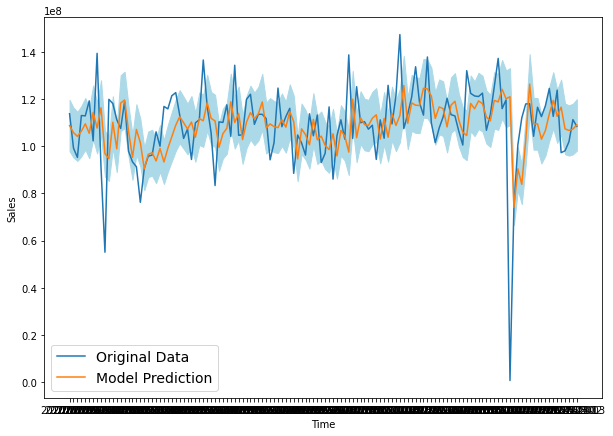

In [48]:
fig = plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[(-len(test_windows) + 180):], values=test_labels[180:, 0], format="-", label="Original Data" , color = 'orange' , end = -30)
plot_time_series(timesteps=X_test[(-len(test_windows) + 180):], values=model_2_preds[180:], format="-", label="Model Prediction" , color = '#0E83C5' , end = -30)
plt.fill_between(x = X_test[(-len(test_windows) + 180):-30] , y1 = upper_2[180:-30] , y2 = lower_2[180:-30] , color = '#ACD9E7')
plt.ylabel('Sales')
fig.savefig("filename.png")

Best Model Till now

l -> linear activation , r -> relu activation

Median - 6708784.0 , Mean - 10180400.0 -> GRU(128)(linear) + Dense(32)(relu) + Dense(10)(linear)

Median - 6655368.0 , Mean - 10271187.0 -> GRU(128l) + Dense(32l) + Dense(10r)